In [3]:
%run GUIanaliza.py
%run velikaMestaEvrope.py
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


# Analiza krajev glede na temperaturne značilnosti
#### PROJEKTNA NALOGA PRI PROGRAMIRANJU 1

Podatki so bili zajeti iz sledečih spletnih strani:
http://www.weatherbase.com/
država, mesto,  id, povprečne temperature po posameznih mesecih;
https://www.countries-ofthe-world.com/capitals-of-europe.html:
seznam Evropskih držav z njihovimi prestolnicami (v drugem delu).

## 1. del: Analiza velikih Evropskih mest

In [2]:
mesta_df = pd.read_csv('podatkiVelikaMesta.txt', encoding='latin1', index_col='MESTO')

Spodaj je prikazanih prvih nekaj mest iz osnovne tabele.

In [3]:
mesta_df[:4]

,Drzava,sifra,januar,februar,marec,april,maj,junij,julij,avgust,september,oktober,november,december,LETNO POVPRECJE
MESTO,,,,,,,,,,,,,,,
Vilnius,Lithuania,267300,-5.0,-4.4,-1.1,5.0,11.7,15.6,16.7,15.6,11.7,5.6,0.6,-3.3,5.0
Warsaw,Poland,57321,-1.7,-1.7,2.8,7.8,13.3,16.1,17.8,17.8,13.3,8.3,2.8,0.0,8.0
Helsinki,Finland,47920,-5.6,-6.1,-2.2,3.3,10.0,13.9,16.7,15.0,10.0,5.0,0.0,-3.9,4.0
Nicosia,Cyprus,60671,10.0,10.0,12.2,16.7,21.7,25.6,28.3,28.3,25.6,20.6,16.1,11.7,18.0


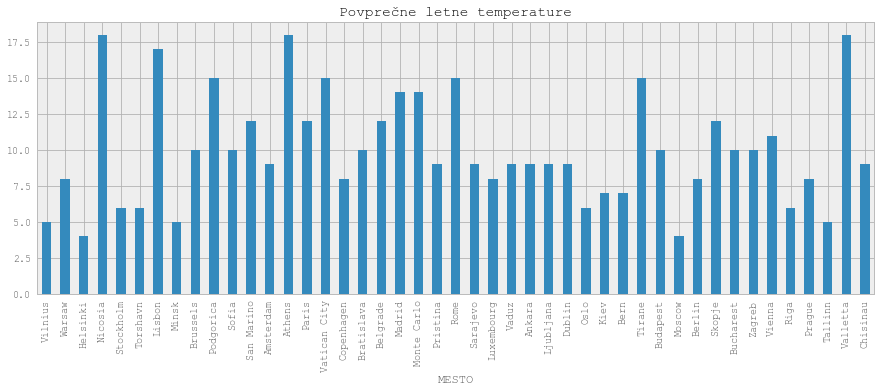

In [4]:
mesta_df['LETNO POVPRECJE'].plot(kind='bar',title='Povprečne letne temperature')

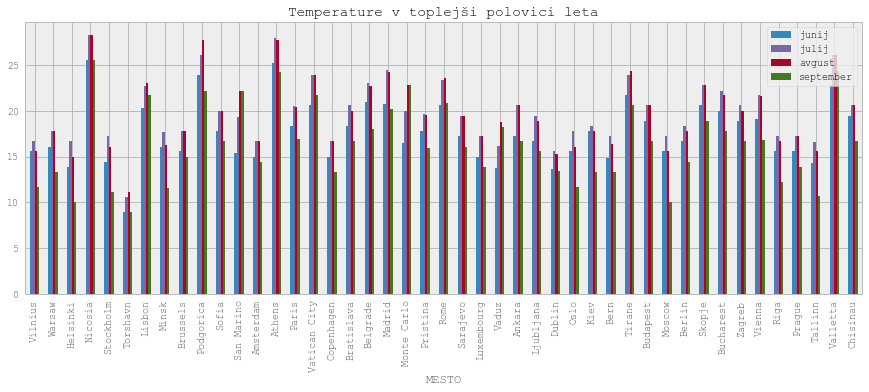

In [5]:
g1 = mesta_df['januar'] 
g2 = mesta_df['februar']
g3 = mesta_df['marec']
g4 = mesta_df['april']
g11 = mesta_df['november']
g12 = mesta_df['december']
g5 = mesta_df['maj']
g6 = mesta_df['junij']
g7 = mesta_df['julij']
g8 = mesta_df['avgust']
g9 = mesta_df['september']
g10 = mesta_df['oktober']
zdruzi2 = pd.concat([g6,g7,g8,g9],axis =1).plot(kind='bar',title='Temperature v toplejši polovici leta')

V spodnji tabeli in grafu so zabeleženi vsi dogodki, ko mesečne temperature padejo pod 0°C. Ker je iz zgornjih dveh tabel razvidno, da temperatura pade pod ledišče le v petih različnih mesecih, obravnavamo le te.

In [6]:
pod_niclo11 = g11<0
pod_niclo12 = g12<0
pod_niclo1 = g1<0
pod_niclo2 = g2<0
pod_niclo3 = g3<0

In [7]:
nov = mesta_df['november'][pod_niclo11]
dec = mesta_df['december'][pod_niclo12]
jan = mesta_df['januar'][pod_niclo1]
feb = mesta_df['februar'][pod_niclo2]
mar = mesta_df['marec'][pod_niclo3]
najbolj_mrzli = pd.concat([nov,dec,jan, feb,mar],axis =1)
#pd.concat([nov,dec,jan, feb,mar],axis =1)

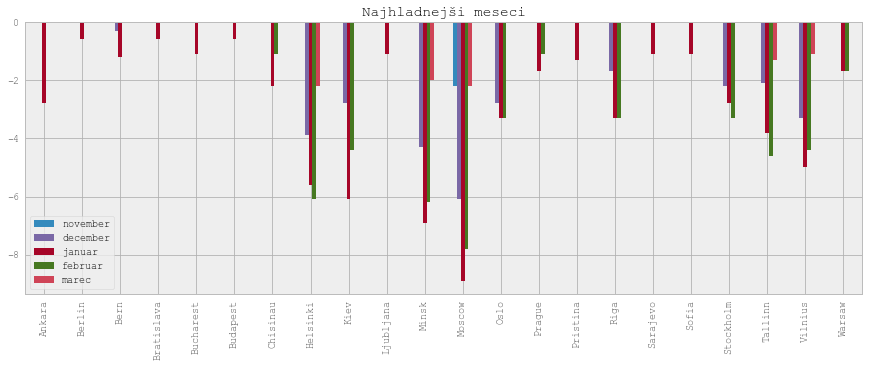

In [8]:
najbolj_mrzli.plot(kind='bar',title='Najhladnejši meseci')

Iz grafa vidimo, da je najhladnejši mesec v letu februar, mesto z najnižjimi temperaturami, pa je Moskva.

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim

C:\Program Files\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3274: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\Program Files\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3283: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


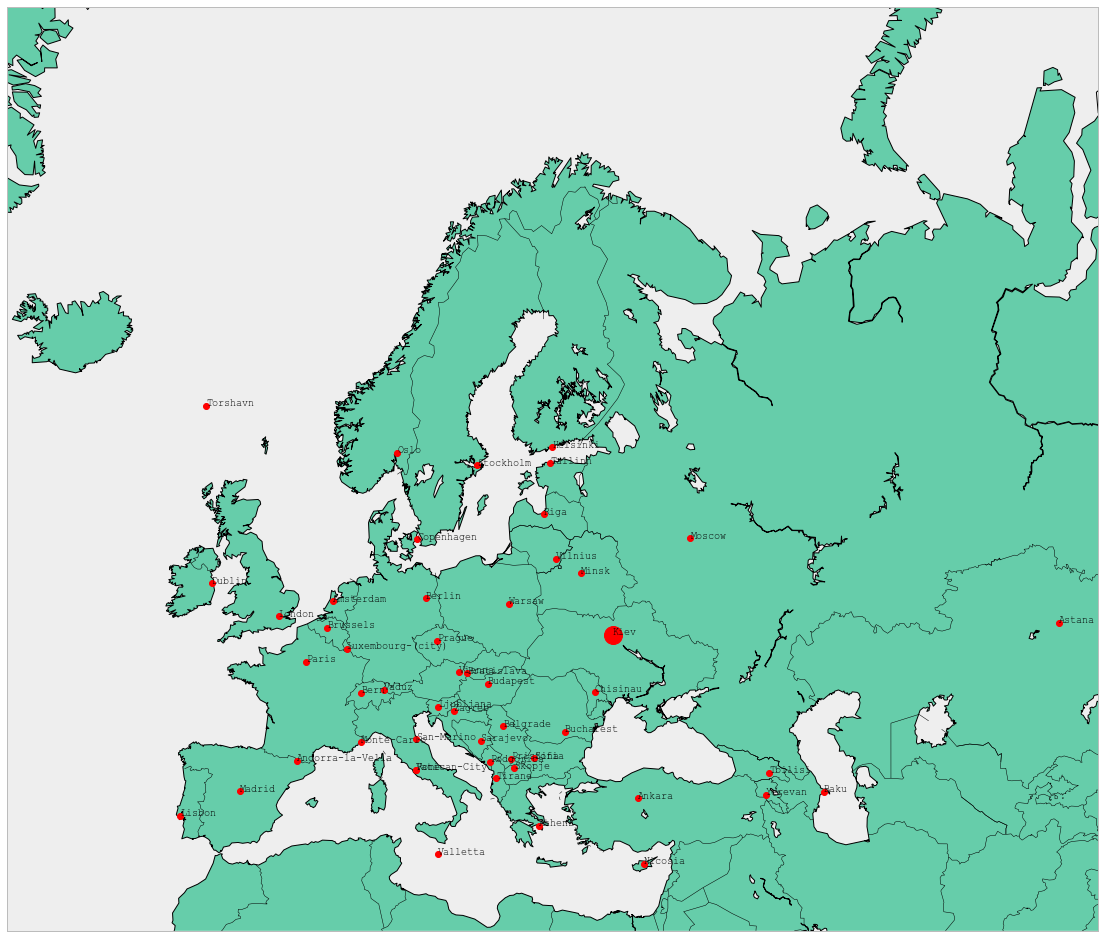

In [ ]:
plt.figure(figsize=(30,17))
           
map = Basemap(projection='merc', lat_0=50, lon_0=0,
    resolution = 'l', area_thresh = 1000.0, llcrnrlon=-25, llcrnrlat=30,
    urcrnrlon=75, urcrnrlat=75)
 
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color='mediumaquamarine')

geolocator = Nominatim()
mestaPoDrzavah = glavna_mesta_drzav()


for mesto in mestaPoDrzavah.values():
    try:
        if mesto == 'Athens':
            x, y = map(23.7333333, 37.9833333)
        else:
            lokacija = geolocator.geocode(mesto)
            x, y = map(lokacija.longitude, lokacija.latitude)
        map.plot(x, y, marker='o', color='Red')
        plt.text(x, y, mesto)                  
    except:
        if 'Kiev' in mesto:
            lokacija = geolocator.geocode('Kiev')
            x, y = map(lokacija.longitude, lokacija.latitude)
            map.plot(x, y, marker='o', color='Red', markersize=18)
            plt.text(x, y, 'Kiev')


plt.show()

## 1.) del: Analiza izbrane države

V prvem delu analize mora uporabnik sam izbrati državo, ki jo želi analizirati. Nato vnese še izbrani mesec in temperaturo. S tem programom nato lahko poišče mesto, ki ima v izbranem mesecu temperaturo najbližjo vnešeni. Najprej prosim zaženi spodnjo funkcijo:

In [20]:
izbrani_mesec, ime_datotekeOsn, ime_datotekeRaz = zazeni_analizaGUI()


    izbrana drzava: Albania 

    izbrani mesec: maj 

    izbrana temperatura: 18°C 

    


Spodaj je prikazana osnovna tabela s podatki o temperaturah za posamezno mesto.

In [21]:
osnovni_df = pd.read_csv(ime_datotekeOsn, encoding='latin1', index_col='MESTO')
razlikaTemperatur_df = pd.read_csv(ime_datotekeRaz, encoding='latin1',index_col='MESTO')
priporoceni_df = pd.read_csv("priporoceni.txt", encoding='latin1',index_col='Mesto')

In [22]:
osnovni_df[:]

,Drzava,drsifra,januar,februar,marec,april,maj,junij,julij,avgust,september,oktober,november,december,LETNO POVPRECJE
MESTO,,,,,,,,,,,,,,,
Barc,Albania,136290,0.0,1.7,5.0,7.8,12.8,16.7,18.9,18.9,15.0,10.0,5.6,1.7,9.0
Boric i Math,Albania,136000,3.9,5.6,8.9,12.8,17.8,21.7,23.9,23.9,20.0,15.0,10.0,5.6,14.0
Ceredzias,Albania,136150,5.6,6.7,8.9,12.8,16.7,20.6,22.8,22.8,18.9,15.0,10.6,7.8,14.0
Durres,Albania,11631,8.9,9.4,11.7,14.4,18.9,22.2,25.0,24.4,22.2,18.3,13.3,10.6,16.0
Fier,Albania,592653,10.0,10.0,11.7,13.9,17.8,21.7,24.4,23.9,21.7,17.8,14.4,11.1,16.0
Gjinokaster,Albania,52631,5.0,6.7,8.3,12.2,16.7,21.1,23.3,24.4,20.0,15.0,10.0,6.7,14.0
Korce,Albania,92631,0.6,2.8,3.3,8.9,13.9,17.8,20.6,21.7,16.1,11.7,6.7,2.8,10.0
Likaj,Albania,592655,10.0,10.0,11.7,13.9,17.8,21.7,24.4,23.9,21.7,17.8,14.4,11.1,16.0
Shkoder,Albania,631,5.6,5.6,7.8,12.8,17.8,21.7,25.0,25.6,21.1,15.6,10.6,6.7,14.0


V spodnji tabeli so podatki o temperaturah za izbrani mesec. V stolpcu z imenom "razlika od vnosa" pa se nahajajo vrednosti, ki povedo, za koliko se vnešena temperatura v tem mesecu razlikuje od dejanske. Mesta so urejena naraščajoče po zadnjih vrednostih.

In [23]:
mesec_df = razlikaTemperatur_df[[izbrani_mesec, 'razlika od vnosa','izbrana temperatura']]
razvrsceni_df = mesec_df.sort_values('razlika od vnosa', ascending=True)
razvrsceni_df[:][[izbrani_mesec, 'razlika od vnosa']]

,maj,razlika od vnosa
MESTO,,
Boric i Math,17.8,0.2
Fier,17.8,0.2
Likaj,17.8,0.2
Shkoder,17.8,0.2
Vlore,17.8,0.2
Tirane,17.2,0.8
Durres,18.9,0.9
Ceredzias,16.7,1.3
Gjinokaster,16.7,1.3


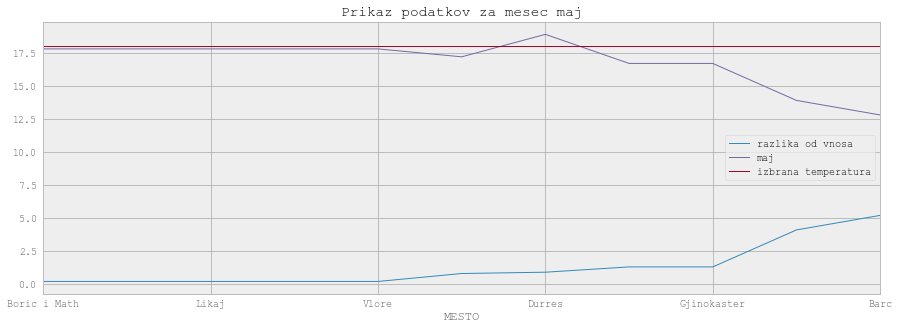

In [24]:
t1 = razvrsceni_df['razlika od vnosa']
t1.colums = ['razlika od vnosa']
t2 = razvrsceni_df[izbrani_mesec]
t2.colums = [izbrani_mesec]
t3 = razvrsceni_df['izbrana temperatura']
t3.colums = ['izbrana temperatura']
zdruzi = pd.concat([t1, t2, t3], axis =1)
zdruzi.plot(title='Prikaz podatkov za mesec ' + izbrani_mesec)

Spodaj je zapisana tabela s podatki, za tri mesta, ki se v izbrani drzavi najbolj priblizajo vašim želenim podatkom.

In [25]:
najblizji3_cela = razlikaTemperatur_df.sort_values('razlika od vnosa', ascending=True)[:3]
najblizji3_cela[:]

,Drzava,drsifra,januar,februar,marec,april,maj,junij,julij,avgust,september,oktober,november,december,LETNO POVPRECJE,razlika od vnosa,izbrana temperatura
MESTO,,,,,,,,,,,,,,,,,
Boric i Math,Albania,136000,3.9,5.6,8.9,12.8,17.8,21.7,23.9,23.9,20.0,15.0,10.0,5.6,14.0,0.2,18
Fier,Albania,592653,10.0,10.0,11.7,13.9,17.8,21.7,24.4,23.9,21.7,17.8,14.4,11.1,16.0,0.2,18
Likaj,Albania,592655,10.0,10.0,11.7,13.9,17.8,21.7,24.4,23.9,21.7,17.8,14.4,11.1,16.0,0.2,18


Ker se verjetno v večini mest vaša izbrana temperatura kar precej razlikuje od dejanske, vam želim priporočiti boljši vnos podatkov. Če želiš najti mesta v katerih se temperatura od vaše trenutno izbrane razlikuja za manj kot 1°C, vam svetujem, da vnesete enaga izmed mesecoev v spodnji tabeli.

In [26]:
priporoceni_df[:]

,mesec
Mesto,
Vlore,februar
Durres,junij
Boric i Math,februar
Shkoder,februar
Korce,januar
Fier,februar
Fier,februarjunij
Likaj,februar
Likaj,februarjunij


Spodnji graf prikazuje kolikšen delež mest s podobno temperaturo boste našli v posameznem mesecu. Če meseca ni na grafu, potem se v tem mesecu temperatura v nobenem mestu dovolj ne približa izbrani temperaturi.

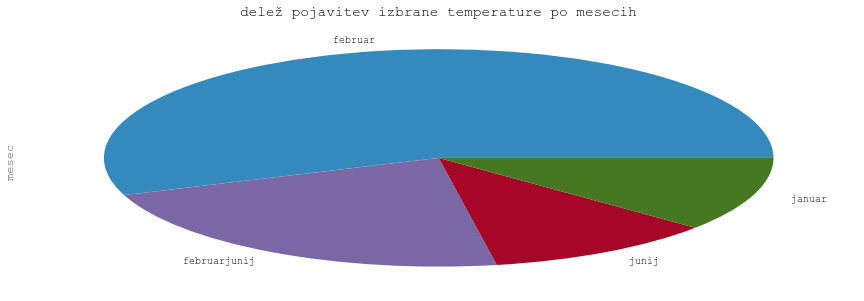

In [27]:
st = priporoceni_df['mesec '].value_counts().plot(kind='pie',title='delež pojavitev izbrane temperature po mesecih')